# MNIST Reconstruction Demo Using a Restricted Boltzmann Machine

This notebook trains an RBM on MNIST and visualizes image reconstruction results.

## Installing simple_rbm from GitHub

In [1]:
!pip install "git+https://github.com/watanabe-appi/simple_rbm.git"

  Cloning https://github.com/watanabe-appi/simple_rbm.git to /tmp/pip-req-build-3utkc5ka
  Running command git clone --filter=blob:none --quiet https://github.com/watanabe-appi/simple_rbm.git /tmp/pip-req-build-3utkc5ka
  Resolved https://github.com/watanabe-appi/simple_rbm.git to commit 544684fd45e9d309c9cf2aa4e7e7bfd553826cfd
  Preparing metadata (setup.py) ... done


## Import Libraries

In [2]:
import tensorflow as tf
from PIL import Image
from simple_rbm import RBM
import numpy as np
import IPython
import matplotlib.pyplot as plt

## Initialize the RBM

In [3]:
rbm = RBM(visible_num=28 * 28, hidden_num=64)

## MNIST Data Preparation

In [4]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
x_train = x_train.reshape(-1, 28 * 28).astype(np.float32)
x_test = x_test.reshape(-1, 28 * 28).astype(np.float32)

## Train the RBM

In [5]:
rbm.fit(x_train, epochs=10, batch_size=1000)

# Computation will proceed on the CPU.
Epoch [1/10], KL Divergence: 0.3689
Epoch [2/10], KL Divergence: 0.2504
Epoch [3/10], KL Divergence: 0.2144
Epoch [4/10], KL Divergence: 0.1982
Epoch [5/10], KL Divergence: 0.1875
Epoch [6/10], KL Divergence: 0.1797
Epoch [7/10], KL Divergence: 0.1736
Epoch [8/10], KL Divergence: 0.1685
Epoch [9/10], KL Divergence: 0.1645
Epoch [10/10], KL Divergence: 0.1612


## Image Reconstruction Visualization

In [6]:
def show_restored_image(input, output):
  fig, axes = plt.subplots(1, 2, figsize=(4, 2))
  axes[0].axis('off')
  axes[0].set_title('Input Image')
  axes[0].imshow(input.reshape((28,28)), cmap='gray')
  axes[1].axis('off')
  axes[1].set_title('Restored Image')
  axes[1].imshow(output.reshape((28,28)), cmap='gray')
  plt.show()

## MNIST Image Reconstruction Results

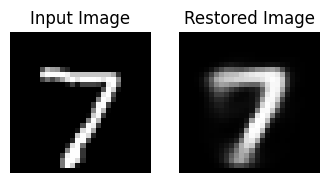

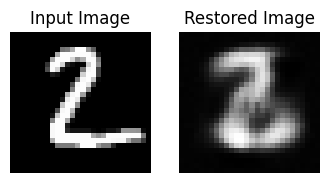

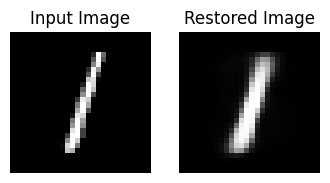

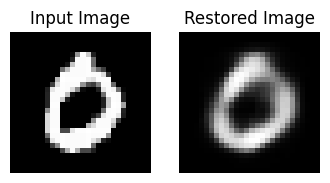

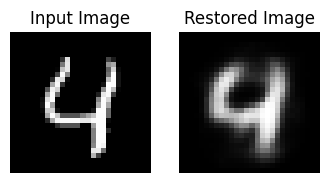

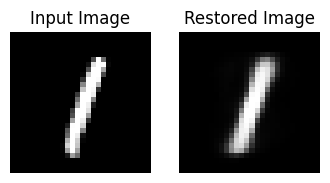

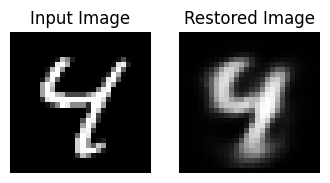

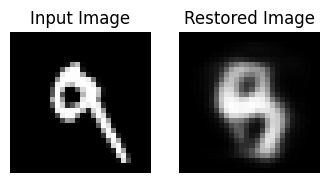

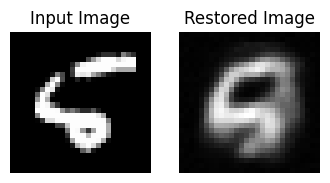

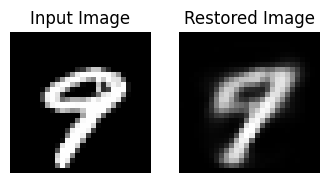

In [7]:
for i in range(10):
  show_restored_image(x_test[i], rbm.reconstruct(x_test[i].reshape(1, 28 * 28))[0])